In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV


In [69]:
water = pd.read_csv("C:/Users/Emiana Emmanuel/Downloads/water_potability.csv")

In [70]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [71]:
water.shape

(3276, 10)

In [72]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [73]:
# Handling missing data

water.dropna(inplace=True)

water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [74]:
water["Potability"].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

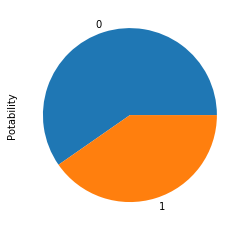

In [75]:
water["Potability"].value_counts().plot(kind='pie')

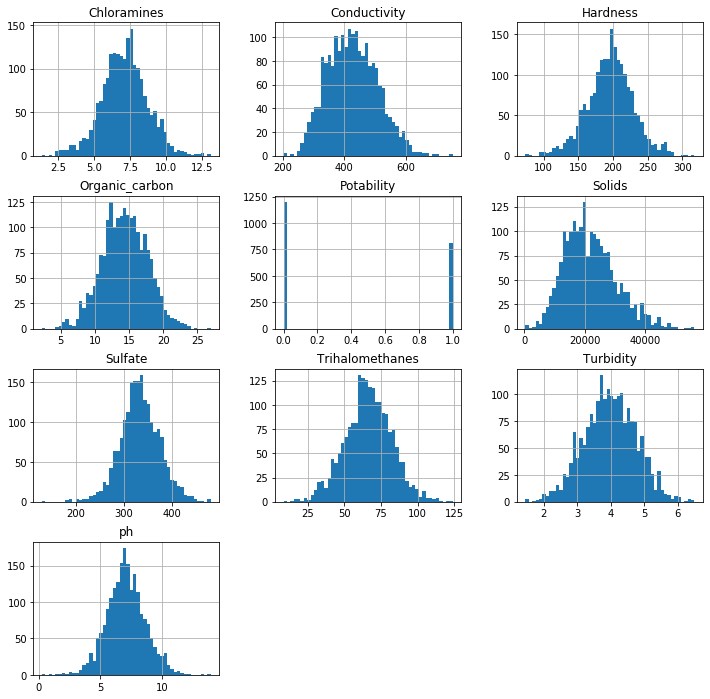

In [76]:


water.hist(figsize=(12, 12), bins=50);

In [77]:
plt.figure()
sns.distplot(water['column']['water.Potability ==1'], color='viridis')
sns.distplot(water['column']['water.Potability ==0'], color='magma');
plt.legend(['Potable','Not Potable' ])

KeyError: 'column'

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.pairplot(data=water , hue='Potability')

In [79]:
def distribution(column):
    if not column == 'Potabilty':
        sns.catplot(x = 'Potabilty', y = column, data=water, kind='box');
        
        plt.figure()
        sns.distplot(water['column']['water.Potability ==1'], color='viridis')
        sns.distplot(water['column']['water.Potability ==0'], color='magma');
        plt.legend(['Potable','Not Potable' ])
        
    for columns in water.columns:
        distribution(columns)

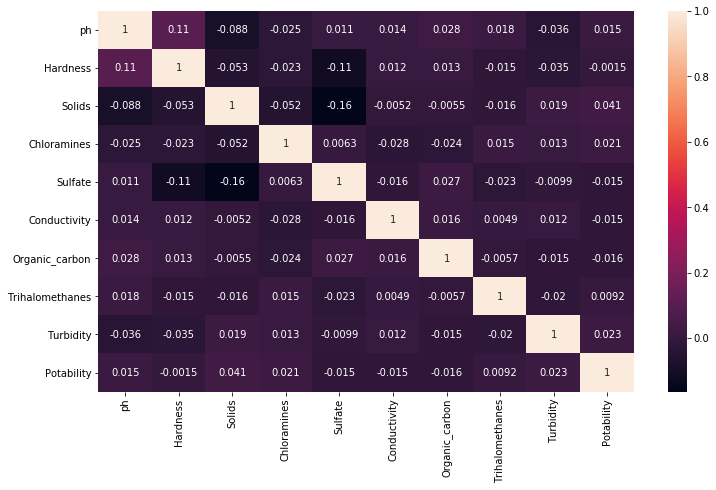

In [80]:
plt.figure(figsize=(12,7))

sns.heatmap(water.corr(), annot=True)

In [81]:
data = water.drop('Potability', axis= 'columns')
target = water.Potability

In [82]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=123, stratify= target)

In [83]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [84]:
len(x_train)

1508

In [85]:
len(x_test)

503

In [86]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6341948310139165

In [87]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [88]:
model.score(x_test, y_test)

0.6043737574552683

In [89]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [90]:
model.score(x_test, y_test)

0.6998011928429424

In [91]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
model.score(x_test, y_test)

0.6938369781312127

In [93]:
# FOR MULTI-MODELS like logistics,decision tree, random forest SVM etc....

#     step 1

model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
        'C':[1,10,20],
        'kernel':['rbf','linear']
         }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':RandomForestClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
        
    }
        
}

In [ ]:
#    step 2

scores=[]
for model_name,mp in model_params.items():
    clf= GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(data,target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [ ]:
# showing your results

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df